# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read Data

In [2]:
X_train = pd.read_csv("/kaggle/input/ibm-classification-feature-selection/X_train_normalized.csv", index_col=[0])
X_test = pd.read_csv("/kaggle/input/ibm-classification-feature-selection/X_test_normalized.csv", index_col=[0])
y_train = pd.read_csv("/kaggle/input/ibm-classification-feature-selection/y_train.csv", index_col=[0])
y_test = pd.read_csv("/kaggle/input/ibm-classification-feature-selection/y_test.csv", index_col=[0]).reset_index(drop=True)

In [3]:
X_train.head(5)

,Symbol,Adj Close,Volume,Unemployment Rate (%),Monthly Average Mortgage Rate (%),Corporate Bond Yield,Quarterly GDP Growth Rate (%),Home Price Index,Sector_Basic Materials,Sector_Communication Services,...,GDP Per Capita 60-Day % Change,Quarterly Real GDP 60-Day % Change,Quarterly GDP Growth Rate (%) 60-Day % Change,Adj Close 7-Day std,Volume 7-Day std,Distance to Adj Close 7-Day Upper Bollinger Band,True Range,MACD,MACD-V,Stochastic Oscillator Histogram
0,-0.409985,-0.053023,-0.207901,2.277843,0.347028,1.101024,2.626289,-1.696,-0.211361,-0.211361,...,1.495269,2.463116,-0.298756,-0.318949,-0.259893,0.287213,2.648838,-0.337742,-0.223829,0.403722
1,-1.542994,-0.272338,-0.260439,2.277843,0.347028,1.101024,2.626289,-1.696,-0.211361,-0.211361,...,1.495269,2.463116,-0.298756,-0.328358,-0.219817,0.288675,1.505748,-0.183911,-0.200182,1.160483
2,1.315448,-0.369802,-0.293393,2.277843,0.347028,1.101024,2.626289,-1.696,-0.211361,-0.211361,...,1.495269,2.463116,-0.298756,-0.237594,-0.304863,0.290735,-0.484016,-0.204393,-0.306159,0.917717
3,-0.735818,-0.113647,-0.186286,2.277843,0.347028,1.101024,2.626289,-1.696,-0.211361,-0.211361,...,1.495269,2.463116,-0.298756,-0.210288,-0.092117,0.205742,1.501630,-0.237497,-0.216311,0.944406
4,-0.113773,-0.079509,-0.273541,2.277843,0.347028,1.101024,2.626289,-1.696,-0.211361,-0.211361,...,1.495269,2.463116,-0.298756,-0.133521,-0.214449,0.287319,1.749039,-0.434175,-0.264215,1.702818


In [4]:
X_test.head(5)

,Symbol,Adj Close,Volume,Unemployment Rate (%),Monthly Average Mortgage Rate (%),Corporate Bond Yield,Quarterly GDP Growth Rate (%),Home Price Index,Sector_Basic Materials,Sector_Communication Services,...,GDP Per Capita 60-Day % Change,Quarterly Real GDP 60-Day % Change,Quarterly GDP Growth Rate (%) 60-Day % Change,Adj Close 7-Day std,Volume 7-Day std,Distance to Adj Close 7-Day Upper Bollinger Band,True Range,MACD,MACD-V,Stochastic Oscillator Histogram
0,1.396906,0.198656,-0.332357,2.709092,-3.611106,-4.157884,4.278549,-2.39251,-0.211361,-0.211361,...,4.482407,3.942167,0.271107,1.329624,-0.310499,-2.336327,-0.269358,0.139212,0.241170,-1.220875
1,1.456149,-0.165569,-0.226043,2.709092,-3.611106,-4.157884,4.278549,-2.39251,-0.211361,-0.211361,...,4.482407,3.942167,0.271107,-0.302702,-0.246767,0.176064,-0.748434,0.006619,0.173811,-1.589459
2,-1.491157,-0.312445,0.129632,2.709092,-3.611106,-4.157884,4.278549,-2.39251,-0.211361,-0.211361,...,4.482407,3.942167,0.271107,-0.366267,0.025331,0.281879,-0.413010,0.143218,0.122423,-0.453795
3,-1.476347,0.393021,-0.055315,2.709092,-3.611106,-4.157884,4.278549,-2.39251,-0.211361,-0.211361,...,4.482407,3.942167,0.271107,0.566579,-0.128803,-1.197869,0.723357,-0.096473,-0.173447,-0.623185
4,1.241395,0.375120,-0.333489,2.709092,-3.611106,-4.157884,4.278549,-2.39251,-0.211361,-0.211361,...,4.482407,3.942167,0.271107,0.174929,-0.311963,-0.112628,-0.112401,0.445014,0.264034,-0.832911


In [5]:
y_train.head(5)

,1-week Forward Return Sign
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [6]:
y_test.head(5)

,1-week Forward Return Sign
0,1.0
1,1.0
2,1.0
3,-1.0
4,1.0


# Fit Logistic Regression Model

### Check class imbalance

<Axes: title={'center': 'Frequency of each class in the training and test targets'}>

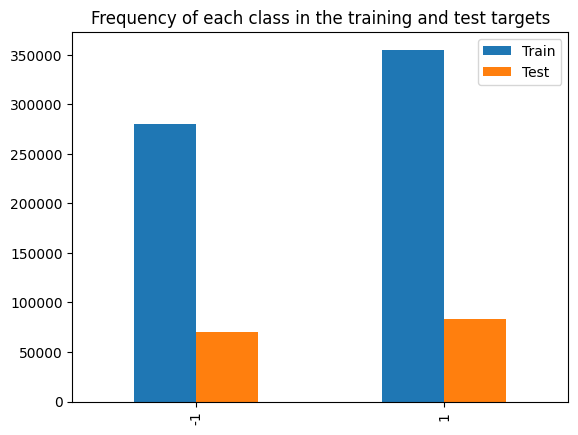

In [7]:
# Examine class imbalance in training and test sets
train_classes = y_train.value_counts().sort_index()
test_classes = y_test.value_counts().sort_index()
class_freq = pd.DataFrame(data=zip(train_classes, test_classes), columns=['Train', 'Test'], index=[-1, 1])
class_freq.plot(kind='bar', title='Frequency of each class in the training and test targets')

### Parameter Optimization

In [8]:
# Imports
from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

# Define parameter grid
grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# Create base model
lr = LogisticRegression()

# Create time series split object to allow for CV without look-ahead bias
tscv = TimeSeriesSplit(n_splits=4)

In [9]:
# Create random search object
random_search = RandomizedSearchCV(
    estimator=lr,
    param_distributions=grid,
    n_iter=12,
    cv=tscv,
    n_jobs=-1,
    scoring='accuracy',
    verbose=3,
    refit=False
)

# Fit the grid search to data
random_search.fit(X_train, y_train)

Fitting 4 folds for each of 12 candidates, totalling 48 fits


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

[CV 1/4] END C=0.001, penalty=l1, solver=liblinear;, score=0.487 total time=   3.7s
[CV 1/4] END C=0.001, penalty=l2, solver=liblinear;, score=0.513 total time=  14.3s
[CV 2/4] END C=0.001, penalty=l2, solver=liblinear;, score=0.516 total time=  28.2s
[CV 1/4] END C=0.01, penalty=l1, solver=liblinear;, score=0.500 total time=10.7min
[CV 1/4] END .C=1, penalty=l1, solver=liblinear;, score=0.514 total time=39.5min
[CV 2/4] END C=0.001, penalty=l1, solver=liblinear;, score=0.498 total time=  27.3s
[CV 3/4] END C=0.001, penalty=l2, solver=liblinear;, score=0.536 total time=  36.7s
[CV 3/4] END C=0.01, penalty=l1, solver=liblinear;, score=0.531 total time= 1.7min
[CV 1/4] END C=0.01, penalty=l2, solver=liblinear;, score=0.488 total time=  20.9s
[CV 3/4] END C=0.01, penalty=l2, solver=liblinear;, score=0.532 total time=  42.9s
[CV 1/4] END C=0.1, penalty=l1, solver=liblinear;, score=0.523 total time=18.0min
[CV 1/4] END .C=1, penalty=l2, solver=liblinear;, score=0.514 total time=  56.2s
[CV 

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


RandomizedSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=4, test_size=None),
                   estimator=LogisticRegression(), n_iter=12, n_jobs=-1,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear']},
                   refit=False, scoring='accuracy', verbose=3)

In [10]:
# Get results of all trained models
cv_results = random_search.cv_results_
print(cv_results)

# Get best params and score
best_params = random_search.best_params_
best_score = random_search.best_score_
print(f"Best params are {best_params}")
print(f"Best accuracy score is {best_score}")

# Save best parameters
import pickle
with open('best_params.pkl', 'wb') as f:
    pickle.dump(best_params, f)

{'mean_fit_time': array([ 29.67922848,  30.20268703, 264.19923776,  36.60603088,
       523.9639104 ,  53.89886379, 853.99021363,  53.71870047,
       565.39267766,  58.18957186, 809.11097312,  59.03804392]), 'std_fit_time': array([ 16.82975845,  10.54081224, 222.26071021,  10.24618624,
       423.83186752,   7.99059414, 913.28519143,   6.04844051,
       456.40345507,   9.10080577, 814.82712898,  10.34524898]), 'mean_score_time': array([0.06999069, 0.09502953, 0.05771244, 0.05700451, 0.0654223 ,
       0.05767381, 0.05853295, 0.05992615, 0.057069  , 0.06009442,
       0.04896241, 0.05530715]), 'std_score_time': array([0.01025836, 0.06206057, 0.00292454, 0.00271572, 0.00514706,
       0.00182864, 0.0036405 , 0.00194524, 0.00439511, 0.00196097,
       0.01007946, 0.01038425]), 'param_solver': masked_array(data=['liblinear', 'liblinear', 'liblinear', 'liblinear',
                   'liblinear', 'liblinear', 'liblinear', 'liblinear',
                   'liblinear', 'liblinear', 'liblinear

### Train model

In [11]:
# Fit model with best params
lr = LogisticRegression(**best_params)
lr.fit(X_train, y_train)
lr.coef_

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         4.13634982e-02,  0.00000000e+00, -5.49275583e-02,
        -3.66930317e-02,  7.54679197e-02, -1.46984187e-02,
        -5.93212632e-03, -3.79042807e-03,  0.00000000e+00,
        -3.61920532e-02,  1.37277647e-04,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  9.04043689e-03,
         0.00000000e+00,  1.92381170e-03, -1.30853416e-02,
         1.35837306e-02,  2.29472577e-02,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  7.01774011e-02,
         0.00000000e+00, -2.65507424e-02,  0.00000000e+00,
         0.00000000e+00,  6.49838362e-03, -1.28077821e-02,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -3.99535524e-02,  0.00000000e+00,  0.00000000e+00,
         1.14887292e-03, -5.18969562e-02, -1.17670023e-02,
         0.00000000e+00, -7.47488574e-02,  0.00000000e+00,
         1.43655533e-01,  3.36584605e-02, -7.53350660e-0

In [12]:
# Predict targets using fitted model
y_pred = lr.predict(X_test)

# Also predict targets for training set to check for overfitting
y_pred_train = lr.predict(X_train)

In [13]:
# Save model
with open('lr_model.pkl', 'wb') as f:
    pickle.dump(lr, f)

# Results Analysis

In [14]:
# Imports needed for accuracy checks
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, roc_auc_score, roc_curve

### Confusion Matrix
The confusion matrix shows us how our predicted labels compare to our actual labels.

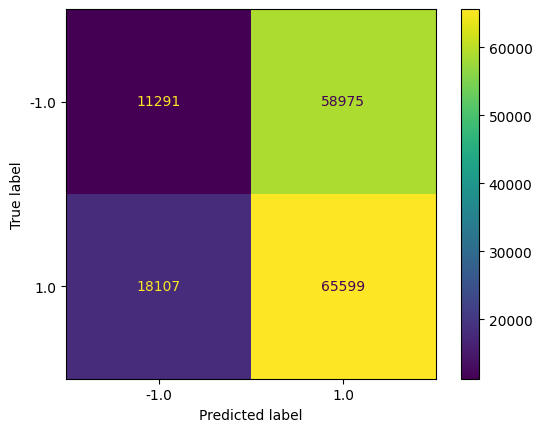

In [15]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot()

### Accuracy, Precision, Recall, F1-Score
* **Accuracy**: Measure of how good the classifier is at predicting correctly. It's simply the number of predictions the classifier got right divided by the total number of predicitions it made. In the confusion, matrix, it's the sum of the leading diagonal divided by the sum of the whole matrix.

* **Precision**: For a given class, this measures how good the classifier is at not incorrectly labelling something as the class. For the given class, it's simply the number of predictions that were correctly labelled as that class divided by the total number of predictions that were labelled with that class.

* **Recall**: For a given class, this measures how good the classifier is at correctly labelling something as that class. For the given class, it's simply the number of predictions that were correctly labelled as that class divided by the total number of actual instances of that class.

* **F1-Score**: For a given class, this is a weighted harmonic mean of precision and recall where each are given equal importance. The best F1-score is 1 and the worst is 0.

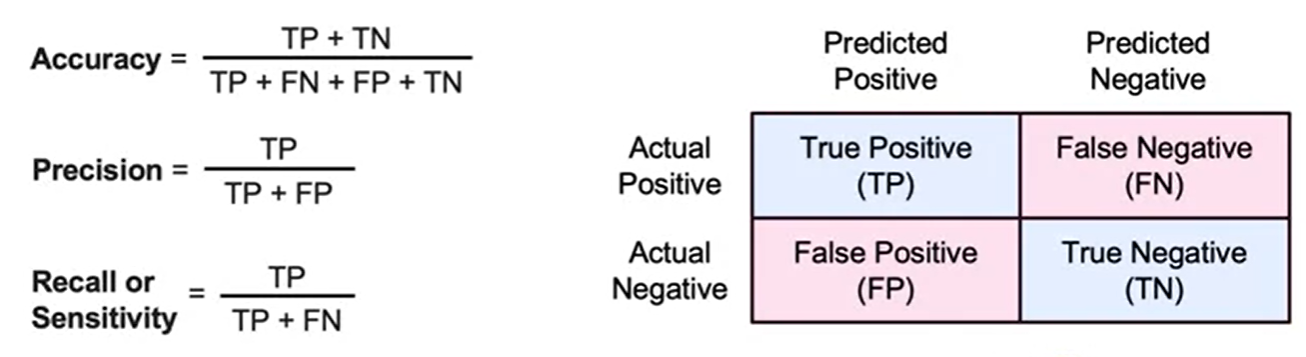
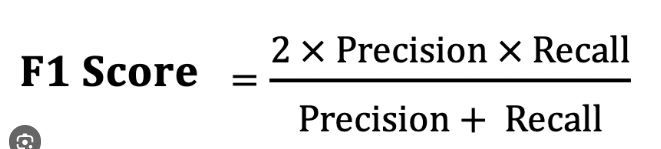

In [16]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set is {accuracy}")
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f"Accuracy on training set is {accuracy_train}")

Accuracy on test set is 0.4993765100148079
Accuracy on training set is 0.578166010369547


In [17]:
# Classification report showing precision, recall and F1 score for each class, as well accuracy and some averages
cr = classification_report(y_test, y_pred, digits=3)
print(cr)

              precision    recall  f1-score   support

        -1.0      0.384     0.161     0.227     70266
         1.0      0.527     0.784     0.630     83706

    accuracy                          0.499    153972
   macro avg      0.455     0.472     0.428    153972
weighted avg      0.462     0.499     0.446    153972



### ROC Curve

Remember that the Logistic Regression algorithm uses probabilities to predict the class of a sample. For example, if the probability the sample belongs to class A is greater than 0.5 then it will be classified as Class A and if it's less than 0.5 it will be classified as Class B. This probability (0.5 in this case) is called the 'classification threshold'. A higher/lower classification threshold can change which data samples get classified as each class.

The Receiver Operating Characteristic (ROC) curve plots the True Positive Rate (aka. recall) against the False Positive Rate for varying levels of this classification threshold. As shown in the image below, TPR is simply the number of true positives relative to the total number of positives and FPR is the number of false positives relative to the total number of negatives. 

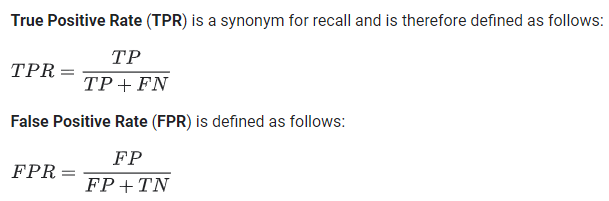

A typical ROC curve is shown below. The classification threshold is DECREASING from left to right. As we decrease the classification threshold, we classify more items as postiive, hence increasing both true positives and false positives.

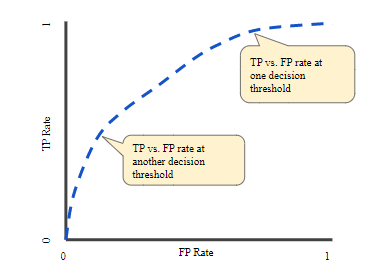

Note to plot this curve, we would need to train a model and then vary the classification threshold between 0 and 1 and calculate the TPR and FPR for each one.

### AUC

AUC stands for area under the ROC curve. It gives us an aggregate measure of performance across all classification thresholds. Since TPR and FPR are between 0 and 1, the value of AUC is also between 0 and 1.

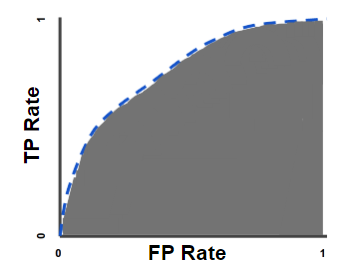

We can interpret AUC as the probability that a random positive example is assigned a higher probability by the regression model than a random negative sample. If the predictions are 100% correct, AUC will be 1 and if they're 100% wrong it will be 0. If the AUC is 0.5 then the model makes predicitions no better than random guessing.

AUC is 0.4424450856878109


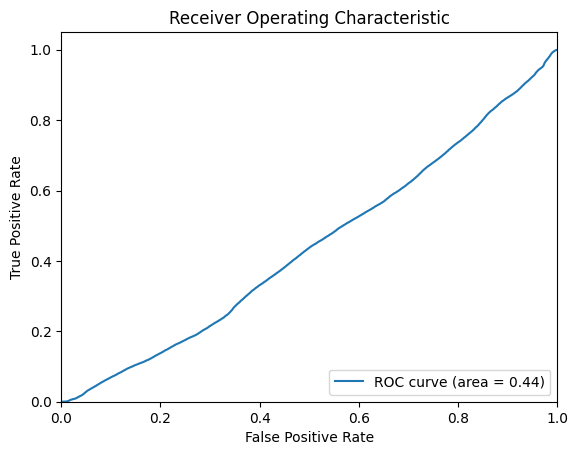

In [18]:
# Import
from sklearn.metrics import roc_curve, roc_auc_score

# Get probabilities of positive class
y_pred_prob = lr.predict_proba(X_test)[:, 1]

# Compute roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Compute AUC
auc = roc_auc_score(y_test, y_pred_prob)
print(f"AUC is {auc}")

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()